ชนม์ธนวัฒน์ แก้วกัณฑ์ 6421600042
พัชรพล เลารุจิราลัย 6421600204

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/0s/xxmc0n411b7_xmq9dlkn2slc0000gn/T/ipykernel_1016/265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('database.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2142 non-null   int64  
 1   name                     2123 non-null   object 
 2   date                     2142 non-null   object 
 3   manner_of_death          2142 non-null   object 
 4   armed                    2136 non-null   object 
 5   age                      2099 non-null   float64
 6   gender                   2141 non-null   object 
 7   race                     2039 non-null   object 
 8   city                     2142 non-null   object 
 9   state                    2142 non-null   object 
 10  signs_of_mental_illness  2142 non-null   bool   
 11  threat_level             2142 non-null   object 
 12  flee                     2106 non-null   object 
 13  body_camera              2142 non-null   bool   
dtypes: bool(2), float64(1), 

In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1986 entries, 0 to 2141
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1986 non-null   int64  
 1   name                     1986 non-null   object 
 2   date                     1986 non-null   object 
 3   manner_of_death          1986 non-null   object 
 4   armed                    1986 non-null   object 
 5   age                      1986 non-null   float64
 6   gender                   1986 non-null   object 
 7   race                     1986 non-null   object 
 8   city                     1986 non-null   object 
 9   state                    1986 non-null   object 
 10  signs_of_mental_illness  1986 non-null   bool   
 11  threat_level             1986 non-null   object 
 12  flee                     1986 non-null   object 
 13  body_camera              1986 non-null   bool   
dtypes: bool(2), float64(1), int64

In [7]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [8]:
df['date'][0][:7]

'2015-01'

In [9]:
def cutDay(date):
    return date[:7]

In [10]:
YMDate = df['date'].apply(cutDay)
df.insert(2, "YMDate",YMDate , True)

In [11]:
df.head()

,id,name,YMDate,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [12]:
dataYMDate = df.value_counts('YMDate').reset_index()
dataYMDate.columns = ['YMDate', 'counts']
dataYMDate.index[-1]

25

In [13]:
dataYMDate.index

RangeIndex(start=0, stop=26, step=1)

In [14]:
# Num = ['1', '2', '3', '4','5','6','7','8','9','10','11','12', '13', '14', '15','16','17','18','19','20','21','22','23','24','25','26']
Num = dataYMDate.index+1
dataYMDate.insert(0, "id",Num , True)
dataYMDate

,id,YMDate,counts
0,1,2015-07,100
1,2,2015-03,91
2,3,2015-08,89
3,4,2016-03,89
4,5,2016-02,85
5,6,2017-01,84
6,7,2015-04,83
7,8,2017-02,82
8,9,2016-06,81
9,10,2016-01,80


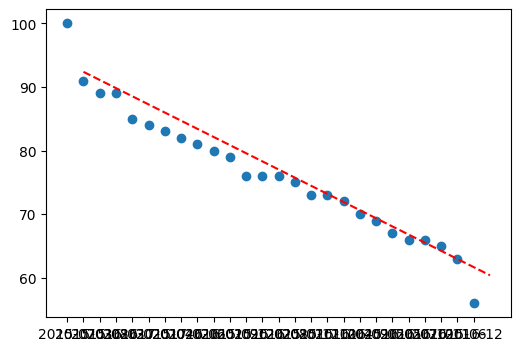

In [15]:
from sklearn.linear_model import LinearRegression
att = dataYMDate[['id']]
label = dataYMDate['counts']

model = LinearRegression()
model.fit(att, label)

ans = model.predict(att)
plt.figure(figsize=[6,4])
plt.scatter(dataYMDate['YMDate'],dataYMDate['counts'])
plt.plot(att,ans,'r--')

In [16]:
model.predict([[40]])

/Users/01134k/Code/Unkonw/KU-Project-Data-mining-Fatal-Police-Shootings-2015-Present/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([42.5008547])

In [17]:
score = model.score(att , label)
score

0.954068617420367

In [18]:
err = 1 - score
err

0.04593138257963303

In [19]:
df.sample(frac=0.7)


,id,name,YMDate,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
555,679,Khari Westly,2015-07,2015-07-26,shot,gun,33.0,M,B,Shreveport,LA,False,attack,Not fleeing,False
1506,1696,Thomas Vandemark,2016-07,2016-07-06,shot,gun,65.0,M,W,Rush Springs,OK,False,other,Not fleeing,True
81,119,Dewayne Deshawn Ward,2015-02,2015-02-03,shot,knife,29.0,M,B,Antioch,CA,True,other,Not fleeing,False
571,695,Virgil Reynolds,2015-08,2015-08-02,shot,vehicle,63.0,M,W,Houston,TX,True,other,Not fleeing,False
894,1036,Justin D. McHenry,2015-11,2015-11-29,shot,gun,22.0,M,W,Celina,OH,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1021,Steve Dormil,2015-11,2015-11-19,shot,knife,27.0,M,B,Fort Pierce,FL,False,attack,Not fleeing,False
1673,1897,Adrian Joseph Shaffer,2016-09,2016-09-10,shot,gun,37.0,M,W,Boulder,CO,False,attack,Not fleeing,True
1613,1799,Marcelo Luna,2016-08,2016-08-19,shot,bayonet,47.0,M,H,East Hollywood,CA,True,undetermined,Not fleeing,False
710,842,Lucien Rolland,2015-09,2015-09-19,shot,gun,46.0,M,W,Slidell,LA,False,attack,Car,False
